In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.signal import savgol_filter


path = "datasets/LEAF_LEVEL_DATASET_Yufeng_Ge.xlsx"

# Read and load dataset
df= pd.read_excel(path, sheet_name="in")





INPUT DATA

In [155]:

X = (df.iloc[:,14:]).values
lambda_min = min(df.iloc[:,14:].columns)
lambda_max = max(df.iloc[:,14:].columns)


Apply a Savitzky-Golay filter

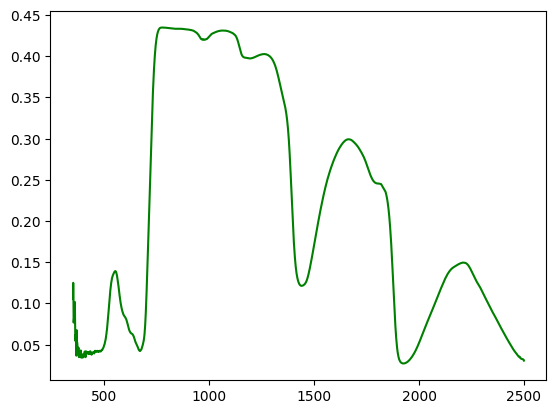

2151


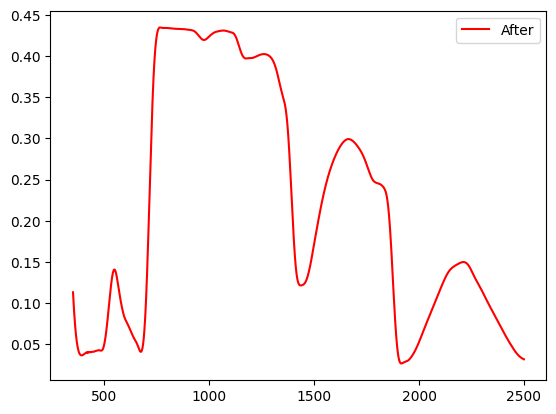

In [214]:
lambdas = np.arange(lambda_min,lambda_max+1)
plt.plot(lambdas, X[0], color="g", label= "Before")
plt.show()
filtered = savgol_filter(X[0], window_length=128,polyorder=6)
print(len(filtered))
plt.plot(lambdas, filtered, color="r", label= "After")
plt.legend()
plt.show()


GAUSSIAN DISTRIBUTION

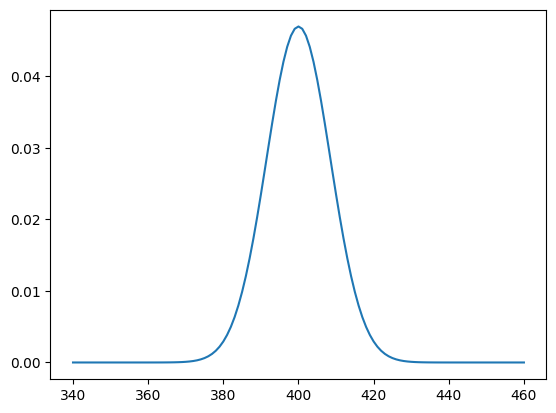

In [94]:

mu = 400
fwhm = 20

def gaussian(r,mu):
 sigma = fwhm/(2*np.sqrt(2*np.log(2)))
 return [(1/(sigma*np.sqrt(2*np.pi)))*np.exp((-1/2)*((x-mu)/sigma)**2) for x in r]


x = np.arange(mu-3*fwhm,mu+3*fwhm + 1, dtype=int)
y = gaussian(x,mu)
plt.plot(x,y)
plt.show()

5 bands, fwhm = 20

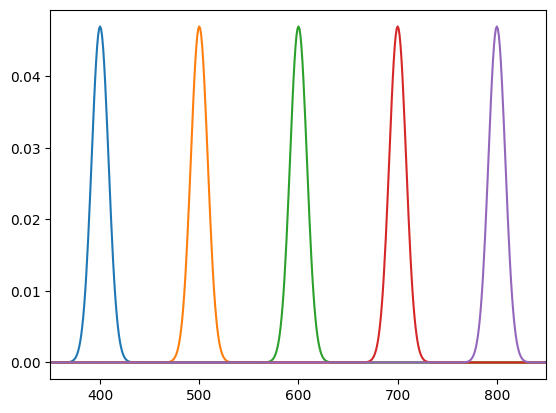

Filter len:  2151


In [140]:
from math import sqrt, log


constrain_min = 400
constrain_max = 800
 
n_bands = 5
fwhm = 20
sigma = fwhm/(2*sqrt(2*log(2)))
mu_list= np.linspace(constrain_min,constrain_max,n_bands)
filters = []
total_filter_points =  len(np.arange(constrain_min - 50, constrain_max + 50, dtype=int)) #1nm delta
for mu in mu_list:
    x = np.arange(lambda_min, lambda_max + 1, dtype=int) #1nm delta
    y = gaussian(x,mu)
    filters.append(y)
    plt.xlim(lambda_min, constrain_max + 50)
    plt.plot(x,y)


filters_len = len(filters[0])
plt.show()
print("Filter len: ", filters_len)


Apply Filter

In [148]:
'''Get First 4 signals'''

signals = X[:4,:]
filtered_signals = []

for signal in signals:
    filtered_signal = []
    for filter in filters: 
        integrand = np.multiply(filter,signal)
        point = sum(integrand) #1nm delta lambda
        filtered_signal.append(point)
    filtered_signals.append(filtered_signal)


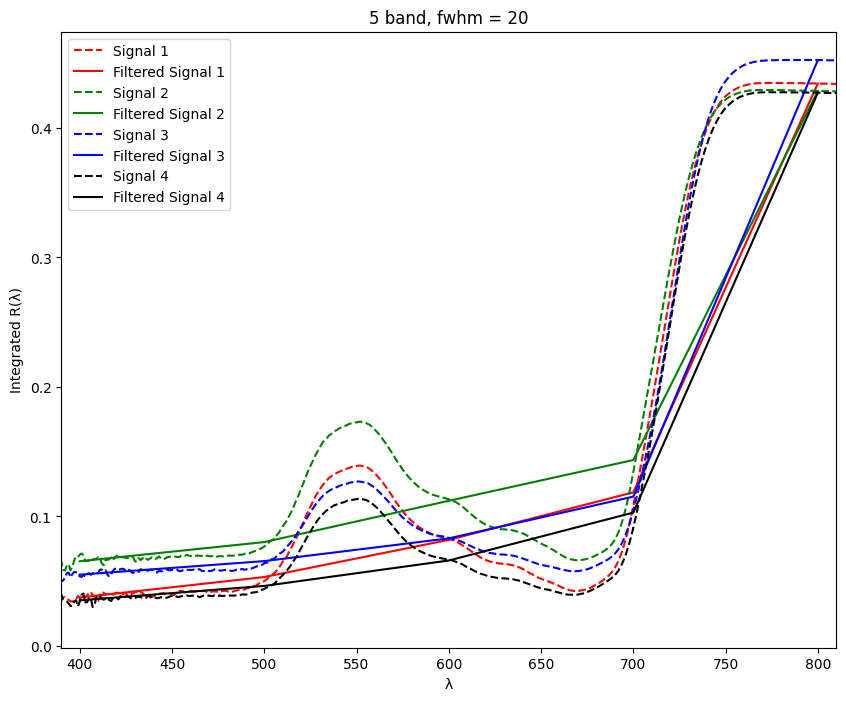

In [147]:
colors = ["r","g","b","k","y"]

x = np.arange(lambda_min, lambda_max + 1, dtype=int) #1nm delta
plt.figure(figsize=(10,8))

i = 0
for signal, filtered_signal in zip(signals,filtered_signals):
    plt.plot(x, signal,"--",color=colors[i], label=f"Signal {i+1}")
    plt.plot(mu_list,filtered_signal,color=colors[i],label=f"Filtered Signal {i+1}")
    i+=1


plt.title(f"{n_bands} band, fwhm = {fwhm}")
plt.legend()
plt.xlabel("λ")
plt.ylabel("Integrated R(λ)")
plt.xlim(constrain_min-10,constrain_max+10)
plt.show()

In [150]:
for signal in filtered_signals:
    print(signal,end="\n")

[0.03737553076690907, 0.053170483800949624, 0.0818864697079144, 0.11859589856252228, 0.43434955832720346]
[0.06538663215650063, 0.08016897885119499, 0.11206234249890552, 0.14354103558075063, 0.42864898468527013]
[0.05499720026024198, 0.06546522239126741, 0.08302705061877083, 0.1152918685742016, 0.4524316235115092]
[0.035175610924306225, 0.04630254783938871, 0.06594143250001173, 0.10293466272492337, 0.42723759558278057]
